# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt  

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low = -90, high = 90, size=1500)
lngs = np.random.uniform(low = -180, high = 180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
count = 0
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

print(f"Beginning Data Retrieval")
print(f"------------------------------")
for city in cities:
        url = (f'https://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}')
#         print(url)
        weather_response = requests.get(url)
        weather_json = weather_response.json()
#         print(weather_json)
        try: 
            Cloudiness.append(weather_json['clouds']["all"])
            Country.append(weather_json['sys']["country"])
            Date.append(weather_json["dt"])
            Humidity.append(weather_json["main"]['humidity'])
            Lat.append(weather_json["coord"]['lat'])
            Lng.append(weather_json["coord"]['lon'])
            Max_Temp.append(weather_json["main"]['temp_max'])
            Wind_Speed.append(weather_json["wind"]['speed'])
            print( "Requesting " , count,"......" ,city)
            count = count + 1
            
        except KeyError:
        
            Cloudiness.append("")
            Country.append("")
            Date.append("")
            Humidity.append("")
            Lat.append("")
            Lng.append("")
            Max_Temp.append("")
            Wind_Speed.append("")
            print("Requesting " , count,"......" ,city, ".....Empty value, try again...")
            count = count + 1

Beginning Data Retrieval
------------------------------
Requesting  0 ...... qaanaaq
Requesting  1 ...... ushuaia
Requesting  2 ...... hermanus
Requesting  3 ...... dunedin
Requesting  4 ...... pisco
Requesting  5 ...... joshimath
Requesting  6 ...... mataura
Requesting  7 ...... naze
Requesting  8 ...... belushya guba .....Empty value, try again...
Requesting  9 ...... tasiilaq
Requesting  10 ...... tiksi
Requesting  11 ...... novoukrayinka
Requesting  12 ...... boa vista
Requesting  13 ...... puerto ayora
Requesting  14 ...... nizhneyansk .....Empty value, try again...
Requesting  15 ...... tilichiki
Requesting  16 ...... hobyo
Requesting  17 ...... hovd
Requesting  18 ...... yellowknife
Requesting  19 ...... shenjiamen
Requesting  20 ...... bambous virieux
Requesting  21 ...... thompson
Requesting  22 ...... mar del plata
Requesting  23 ...... busselton
Requesting  24 ...... atuona
Requesting  25 ...... taolanaro .....Empty value, try again...
Requesting  26 ...... port alfred
Reque

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#display the data frame
cities_df = pd.DataFrame({
                            "City" : cities, 
                            "Cloudiness" : Cloudiness,
                            "Country" : Country, 
                            "Date" : Date,
                            "Humidity" : Humidity, 
                            "Lat" : Lat,
                            "Lng" : Lng,
                            "Max_Temp" : Max_Temp,
                            "Wind_Speed" : Wind_Speed
                        })
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,qaanaaq,99,GL,1595211509,75,77.48,-69.36,46.04,0.76
1,ushuaia,0,AR,1595211509,92,-54.8,-68.3,26.6,5.82
2,hermanus,7,ZA,1595211510,93,-34.42,19.23,54,1.99
3,dunedin,100,NZ,1595210959,79,-45.87,170.5,48,1.99
4,pisco,17,PE,1595211510,82,-13.7,-76.22,61,8.05
...,...,...,...,...,...,...,...,...,...
586,fort nelson,75,CA,1595211638,44,58.81,-122.7,75.2,3.36
587,kieta,6,PG,1595211638,73,-6.22,155.63,83.95,8.25
588,malko tarnovo,91,BG,1595211638,64,41.98,27.53,71.6,4.7
589,enshi,96,CN,1595211638,76,30.3,109.48,78.82,1.7


In [9]:
#save the file into a CSV file in the Resources Folder
cities_df.to_csv("Resources/cities.csv", encoding="utf-8", index=False)

In [10]:
#Replace the emppty values with Nan=N, then clean the data frame from the NaN values
nan_value = float("NaN")
cities_df.replace("", nan_value, inplace = True)
cities_df.dropna(subset = ["Cloudiness"], inplace = True)
cities_df.dropna(subset = ["Country"], inplace = True)
cities_df.dropna(subset = ["Date"], inplace = True)
cities_df.dropna(subset = ["Humidity"], inplace = True)
cities_df.dropna(subset = ["Lat"], inplace = True)
cities_df.dropna(subset = ["Lng"], inplace = True)
cities_df.dropna(subset = ["Max_Temp"], inplace = True)
cities_df.dropna(subset = ["Wind_Speed"], inplace = True)
clean_city_data_df = cities_df
clean_city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,qaanaaq,99.0,GL,1.595212e+09,75.0,77.48,-69.36,46.04,0.76
1,ushuaia,0.0,AR,1.595212e+09,92.0,-54.80,-68.30,26.60,5.82
2,hermanus,7.0,ZA,1.595212e+09,93.0,-34.42,19.23,54.00,1.99
3,dunedin,100.0,NZ,1.595211e+09,79.0,-45.87,170.50,48.00,1.99
4,pisco,17.0,PE,1.595212e+09,82.0,-13.70,-76.22,61.00,8.05
...,...,...,...,...,...,...,...,...,...
586,fort nelson,75.0,CA,1.595212e+09,44.0,58.81,-122.70,75.20,3.36
587,kieta,6.0,PG,1.595212e+09,73.0,-6.22,155.63,83.95,8.25
588,malko tarnovo,91.0,BG,1.595212e+09,64.0,41.98,27.53,71.60,4.70
589,enshi,96.0,CN,1.595212e+09,76.0,30.30,109.48,78.82,1.70


In [11]:
clean_city_data_df.count()

City          538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Lng           538
Max_Temp      538
Wind_Speed    538
dtype: int64

In [12]:
#Save the new clean file in the same folder as the other file
clean_city_data_df.to_csv("Resources/clean_cities.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
clean_city_data_hum_df = clean_city_data_df[clean_city_data_df["Humidity"]>100]
clean_city_data_hum_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed


There are no cities with Humidity higher tham 100, so we proceed to next step

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

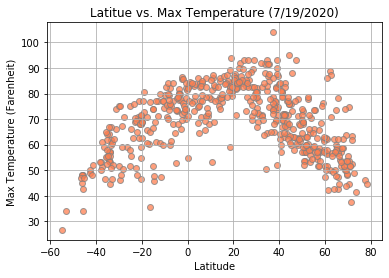

<Figure size 432x288 with 0 Axes>

In [17]:
lat = clean_city_data_df ["Lat"]
temp = clean_city_data_df ["Max_Temp"]

plt.scatter(lat, temp,color="coral", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Latitue vs. Max Temperature (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_Temp.png")

## Latitude vs. Humidity Plot

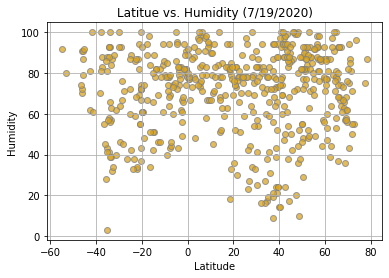

<Figure size 432x288 with 0 Axes>

In [18]:
lat = clean_city_data_df ["Lat"]
hum = clean_city_data_df ["Humidity"]

plt.scatter(lat, hum,color="goldenrod", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitue vs. Humidity (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

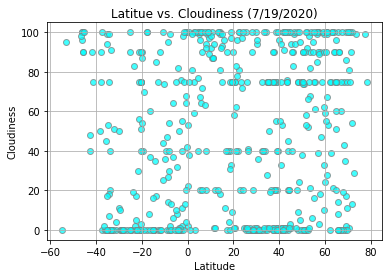

<Figure size 432x288 with 0 Axes>

In [19]:
lat = clean_city_data_df ["Lat"]
cloud = clean_city_data_df ["Cloudiness"]

plt.scatter(lat, cloud,color="aqua", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitue vs. Cloudiness (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

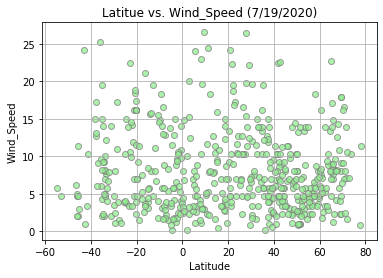

<Figure size 432x288 with 0 Axes>

In [20]:
lat = clean_city_data_df ["Lat"]
wind = clean_city_data_df ["Wind_Speed"]

plt.scatter(lat, wind,color="lightgreen", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Latitue vs. Wind_Speed (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_WindSpeed.png")

## Linear Regression

In [21]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = clean_city_data_df[clean_city_data_df["Lat"]>0]
northern_hemisphere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,qaanaaq,99.0,GL,1.595212e+09,75.0,77.48,-69.36,46.04,0.76
5,joshimath,36.0,IN,1.595212e+09,54.0,30.57,79.57,68.97,2.13
7,naze,20.0,JP,1.595212e+09,79.0,28.37,129.48,89.60,11.41
9,tasiilaq,8.0,GL,1.595212e+09,93.0,65.61,-37.64,42.80,6.93
10,tiksi,13.0,RU,1.595211e+09,50.0,71.69,128.87,63.54,7.11
...,...,...,...,...,...,...,...,...,...
585,agrafa,0.0,GR,1.595212e+09,88.0,39.14,21.65,52.00,0.51
586,fort nelson,75.0,CA,1.595212e+09,44.0,58.81,-122.70,75.20,3.36
588,malko tarnovo,91.0,BG,1.595212e+09,64.0,41.98,27.53,71.60,4.70
589,enshi,96.0,CN,1.595212e+09,76.0,30.30,109.48,78.82,1.70


In [22]:
southern_hemisphere_df = clean_city_data_df[clean_city_data_df["Lat"]<0]
southern_hemisphere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
1,ushuaia,0.0,AR,1.595212e+09,92.0,-54.80,-68.30,26.60,5.82
2,hermanus,7.0,ZA,1.595212e+09,93.0,-34.42,19.23,54.00,1.99
3,dunedin,100.0,NZ,1.595211e+09,79.0,-45.87,170.50,48.00,1.99
4,pisco,17.0,PE,1.595212e+09,82.0,-13.70,-76.22,61.00,8.05
6,mataura,100.0,NZ,1.595212e+09,70.0,-46.19,168.86,48.13,4.70
...,...,...,...,...,...,...,...,...,...
576,pucallpa,30.0,PE,1.595212e+09,68.0,-8.38,-74.55,77.43,1.68
577,beberibe,0.0,BR,1.595212e+09,83.0,-4.18,-38.13,78.80,5.82
580,port lincoln,53.0,AU,1.595211e+09,57.0,-34.73,135.87,55.65,9.26
582,ulundi,0.0,ZA,1.595212e+09,45.0,-28.34,31.42,50.36,3.87


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

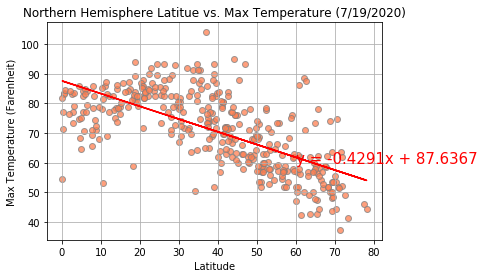

 R-squared is 0.4464366765084648


<Figure size 432x288 with 0 Axes>

In [23]:
n_lat = northern_hemisphere_df ["Lat"]
n_temp = northern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(n_lat, n_temp,color="coral", edgecolors="grey", alpha=0.75)
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(60,60), fontsize = 15, color = "red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Northern Hemisphere Latitue vs. Max Temperature (7/19/2020)")

plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Temperature.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

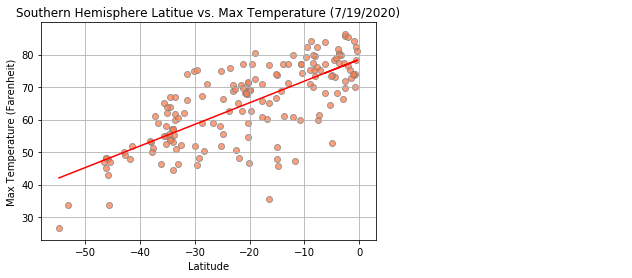

 R-squared is 0.54474336041835


<Figure size 432x288 with 0 Axes>

In [24]:
s_lat = southern_hemisphere_df ["Lat"]
s_temp = southern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_temp)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(20,20), fontsize = 15, color = "red")

plt.scatter(s_lat, s_temp,color="coral", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Southern Hemisphere Latitue vs. Max Temperature (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Temperature.png")
print(f" R-squared is {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

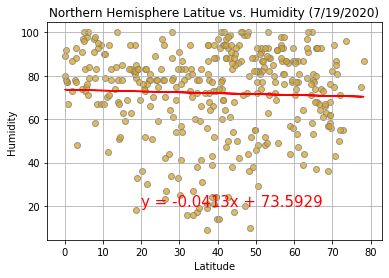

 R-squared is 0.001542625628904091


<Figure size 432x288 with 0 Axes>

In [25]:
n_lat = northern_hemisphere_df ["Lat"]
n_hum = northern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_hum)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(20,20), fontsize = 15, color = "red")

plt.scatter(n_lat, n_hum,color="goldenrod", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Latitue vs. Humidity (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Humidity.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

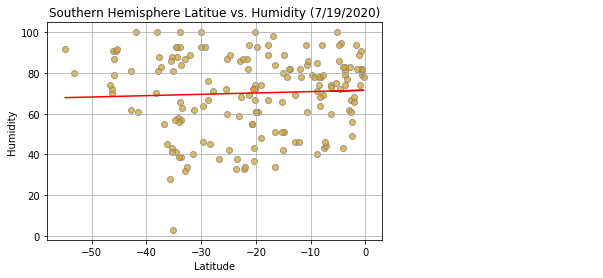

 R-squared is 0.0022449186157023275


<Figure size 432x288 with 0 Axes>

In [26]:
s_lat = southern_hemisphere_df ["Lat"]
s_hum = southern_hemisphere_df ["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_hum )
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(10,50), fontsize = 15, color = "red")

plt.scatter(s_lat,s_hum,color="goldenrod", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Latitue vs. Humidity (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Humidity.png")
print(f" R-squared is {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

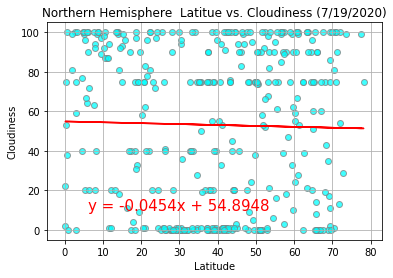

 R-squared is 0.0005276712218325748


<Figure size 432x288 with 0 Axes>

In [27]:
n_lat = northern_hemisphere_df ["Lat"]
n_cloud = northern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloud)
regress_values = n_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(n_lat, n_cloud,color="aqua", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere  Latitue vs. Cloudiness (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Cloudiness.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

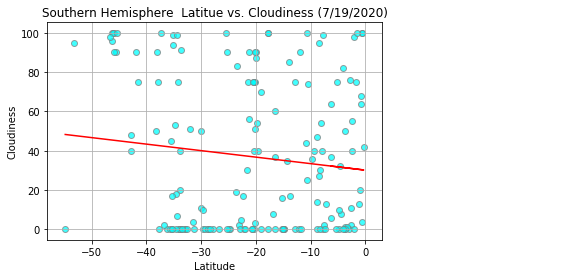

 R-squared is 0.01422723264519103


<Figure size 432x288 with 0 Axes>

In [28]:
s_lat = southern_hemisphere_df ["Lat"]
s_cloud = southern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloud)
regress_values = s_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(s_lat, s_cloud,color="aqua", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere  Latitue vs. Cloudiness (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Cloudiness.png")
print(f" R-squared is {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

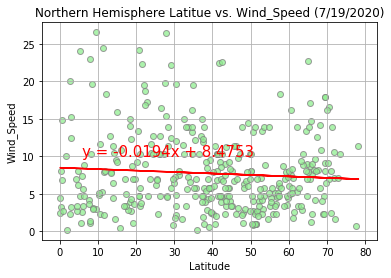

 R-squared is 0.005517533203703626


<Figure size 432x288 with 0 Axes>

In [29]:
n_lat = northern_hemisphere_df ["Lat"]
n_wind = northern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind)
regress_values = n_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(n_lat, n_wind,color="lightgreen", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Northern Hemisphere Latitue vs. Wind_Speed (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Wind.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

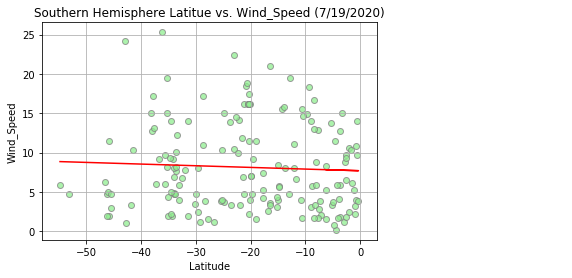

 R-squared is 0.0027493893062606385


<Figure size 432x288 with 0 Axes>

In [30]:
s_lat = southern_hemisphere_df ["Lat"]
s_wind = southern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat,s_wind)
regress_values = s_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(s_lat, s_wind,color="lightgreen", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Southern Hemisphere Latitue vs. Wind_Speed (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Wind.png")
print(f" R-squared is {rvalue**2}")